In [2]:
from EnergyDisaggregation.energydisaggregation.dataloader.config import DATACONFIG, CONFIG_WEATHER, CONFIG_POWER
from EnergyDisaggregation.energydisaggregation.feature_engineering.utils import get_dataframe
import pandas as pd
import warnings
pd.options.plotting.backend = "plotly"
warnings.simplefilter(action='ignore', category=FutureWarning)

c:\Users\e32cl\Documents\M2\P3 Capstone\projet\EnergyDisaggregation\EnergyDisaggregation\energydisaggregation\dataloader\dataloader.py:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[config["Date"]].str.replace("T", " ").str.replace("+", " +")
c:\Users\e32cl\Documents\M2\P3 Capstone\projet\EnergyDisaggregation\EnergyDisaggregation\energydisaggregation\dataloader\dataloader.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[config["Date"]] = pd.to_datetime(
c:\Users\e32cl\Documents\M2\P3 Capstone\projet\EnergyDisaggregation\EnergyDisaggregation\energydisaggregation\dataloader\da

In [3]:
df_process = get_dataframe()

In [ ]:
df_process.info()

In [5]:
df_region = df_process.xs("Occitanie",level=DATACONFIG["Region"])

### Test modele

In [45]:
# drop missing values
df_region_no_miss = df_region.dropna(axis=0)
print("pb saturation : list object + missing value", df_region_no_miss["saturation"].iloc[793])

pb saturation : list object + missing value []


First test : drop saison (à encoder), drop saturation (à gérer)

Drop years and regions : ok

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Split randomly

In [46]:
X = df_region_no_miss.drop(['regions', DATACONFIG["Power"], 'saison', 'years', 'saturation'], axis=1)
y = df_region_no_miss[DATACONFIG["Power"]]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

Split years

In [58]:
test = df_region_no_miss[(df_region_no_miss['years']=="2018") | (df_region_no_miss['years']=="2019")]
train = df_region_no_miss[(df_region_no_miss['years']!="2018") & (df_region_no_miss['years']!="2019")]
print(len(test), len(train))
X_train = train.drop(['regions', DATACONFIG["Power"], 'saison', 'years', 'saturation'], axis=1)
y_train = train[DATACONFIG["Power"]]
X_test = test.drop(['regions', DATACONFIG["Power"], 'saison', 'years', 'saturation'], axis=1)
y_test = test[DATACONFIG["Power"]]

730 1819


In [59]:
reg = RandomForestRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [60]:
from sklearn.metrics import mean_squared_error, explained_variance_score
print(mean_squared_error(y_test, y_pred, squared=False))
print(reg.score(X_test, y_test))
print(explained_variance_score(y_test, y_pred))

13002.115339313481
0.915351613154003
0.9205509566084621


In [61]:
import numpy as np
import matplotlib.pyplot as plt

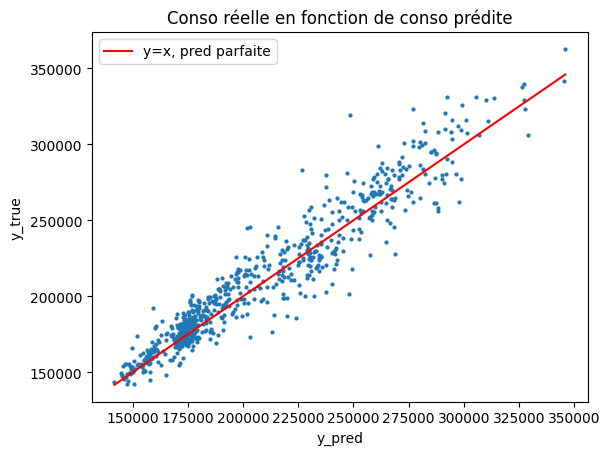

In [62]:
plt.scatter(y_pred, y_test, s=4)
x = np.linspace(y_pred.min(), y_pred.max(), 3)
plt.plot(x,x, color='red', label="y=x, pred parfaite")
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Conso réelle en fonction de conso prédite")
plt.legend()

### Prediction

In [63]:
occitanie_2019 = df_region_no_miss[df_region_no_miss['years']=="2019"]
X_2019 = occitanie_2019.drop(['regions', DATACONFIG["Power"], 'saison', 'years', 'saturation'], axis=1)
y = occitanie_2019[DATACONFIG["Power"]]

In [64]:
X_2019.head()

,Température (°C),Nebulosité totale,Vitesse du vent moyen 10 mn,Humidité,Vitesse du vent en km/h,Température ressentie,week_day,month,is_holiday,is_bank_holiday,...,month_cos,week_day_sin,week_day_cos,Nebulosité totale_lag_1,Nebulosité totale_lag_2,Nebulosité totale_lag_3,Nebulosité totale_lag_4,Nebulosité totale_lag_5,Nebulosité totale_lag_6,Nebulosité totale_lag_7
Date - Heure,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00+01:00,1.563542,100.739583,1.306250,91.427083,4.70250,0.265930,1,1,True,True,...,0.866025,0.781831,0.623490,0.239583,0.114583,1.270833,0.947917,3.239583,0.729167,0.072917
2019-01-02 00:00:00+01:00,5.676042,100.000000,7.470833,65.520833,26.89500,1.205215,2,1,True,False,...,0.866025,0.974928,-0.222521,-0.739583,-0.500000,-0.625000,0.531250,0.208333,2.500000,-0.010417
2019-01-03 00:00:00+01:00,2.423958,95.208333,4.938542,70.156250,17.77875,-1.869905,3,1,True,False,...,0.866025,0.433884,-0.900969,-4.791667,-5.531250,-5.291667,-5.416667,-4.260417,-4.583333,-2.291667
2019-01-04 00:00:00+01:00,1.505208,87.916667,3.075000,58.979167,11.07000,-1.771846,4,1,True,False,...,0.866025,-0.433884,-0.900969,-7.291667,-12.083333,-12.822917,-12.583333,-12.708333,-11.552083,-11.875000
2019-01-05 00:00:00+01:00,2.911458,100.278274,4.370833,66.656250,15.73500,-0.947324,5,1,True,False,...,0.866025,-0.974928,-0.222521,12.361607,5.069940,0.278274,-0.461310,-0.221726,-0.346726,0.809524


In [65]:
conso_pred = reg.predict(X_2019)

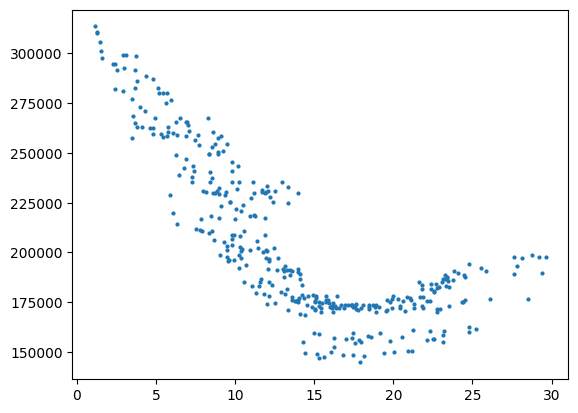

In [66]:
plt.scatter(X_2019['Température (°C)'], conso_pred, s=4)

In [67]:
def compute_polynomial_fit(temp, conso):
    fit_poly = np.polyfit(temp, conso, 4)
    points = np.linspace(temp.min() - 1, temp.max() + 1, 400)
    values_poly = [np.polyval(fit_poly, i) for i in points]
    return points, values_poly

In [68]:
def compute_min_satur(poly_values_x, poly_values_y):
    saturation = [
        poly_values_x[i]
        for i in range(1, len(poly_values_y) - 1)
        if poly_values_y[i - 1] < poly_values_y[i] > poly_values_y[i + 1]
    ]
    minimum = poly_values_x[np.argmin(poly_values_y)]
    return minimum, saturation

In [69]:
pts, values_poly = compute_polynomial_fit(X_2019['Température (°C)'], conso_pred)

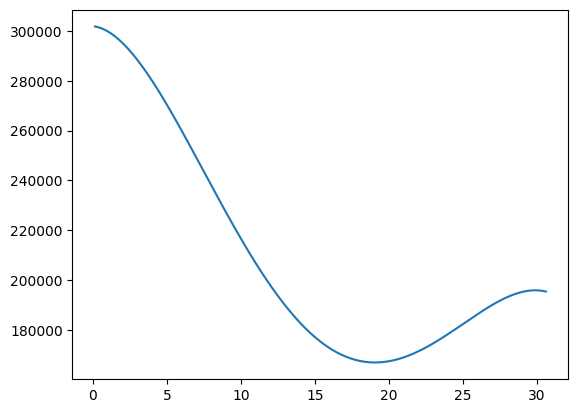

In [70]:
plt.plot(pts, values_poly)

In [71]:
min, satur = compute_min_satur(pts, values_poly)

In [72]:
print(min)
print(np.min(values_poly))
print(satur)

19.09165622389309
166964.15512219092
[29.944439223057664]


Thermosensitivity consumption

In [73]:
courbe_therm = conso_pred - np.min(values_poly)
courbe_reg = conso_pred - courbe_therm

In [74]:
res = pd.DataFrame({'conso_tot':conso_pred, 'conso_true':y, 
                    'conso_therm':courbe_therm, 'conso_reg':courbe_reg}, index = X_2019.index)

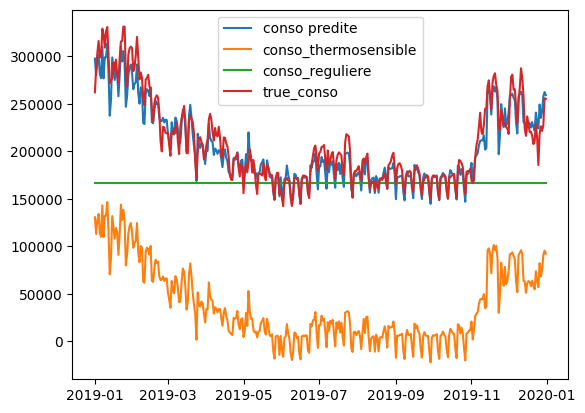

In [75]:
plt.plot(res['conso_tot'], label='conso predite')
plt.plot(res['conso_therm'], label="conso_thermosensible")
plt.plot(res['conso_reg'], label="conso_reguliere")
plt.plot(y, label='true_conso')
plt.legend()